In [137]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [138]:
# load data
df = pd.read_csv("heart.csv")

In [139]:
print("Shape: ", df.shape)
print(df.describe())
# df.describe()
print("===================================================")
print(df.head())

Shape:  (918, 12)
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
   Age Sex ChestPainType  RestingBP  Choleste

## EDA

In [140]:
# check for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [141]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    str    
 2   ChestPainType   918 non-null    str    
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    str    
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    str    
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    str    
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), str(5)
memory usage: 86.2 KB


In [142]:
# total number of males and females
m = (df["Sex"]=="M").sum()
f = (df["Sex"]=="F").sum()
print(m)
print(f)
print(m+f)
arr = np.array([m,f])
labels = ["male", "female"]

725
193
918


([<matplotlib.patches.Wedge at 0x25f2f8a34d0>,
 [Text(-0.8686626849229542, 0.674851939185511, 'male'),
  Text(0.8686629048175811, -0.6748516561392452, 'female')])

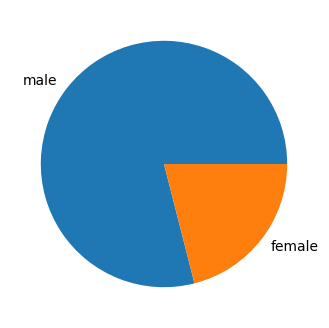

In [143]:
# plot male to female on pie chart
plt.figure(figsize=(6,4))
plt.pie(arr, labels=labels)

<Axes: xlabel='Sex'>

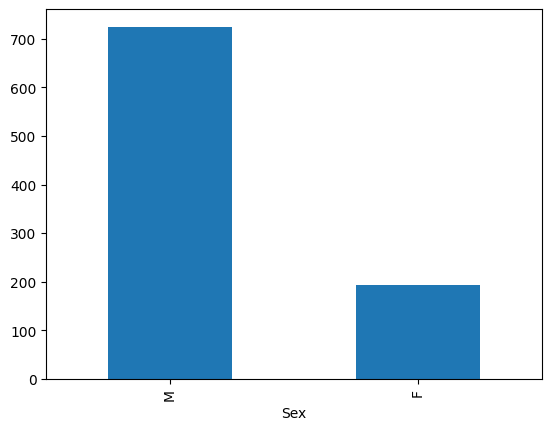

In [144]:
df["Sex"].value_counts().plot(kind= "bar")

In [145]:
print(df.duplicated().sum())

0


<Axes: xlabel='HeartDisease'>

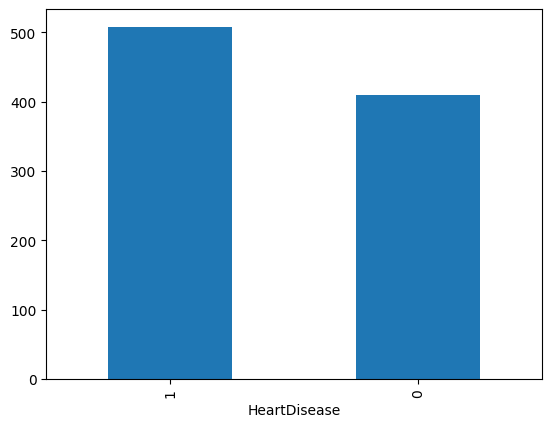

In [146]:
# plot
df["HeartDisease"].value_counts()
df["HeartDisease"].value_counts().plot(kind= "bar")
# 1 = have heart disease
# 0 = have no heart disease


In [147]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


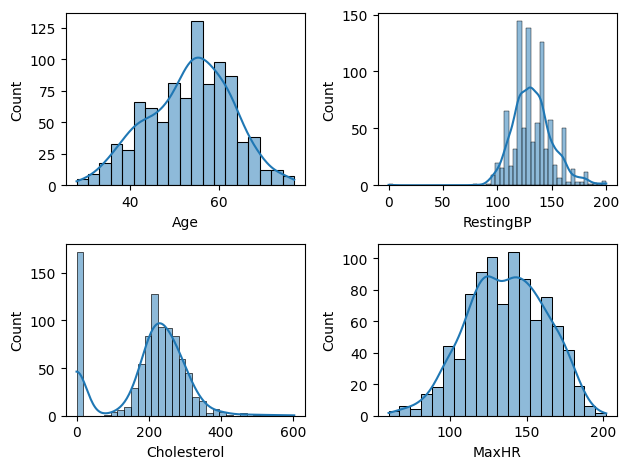

In [148]:
def plotting(name,val):
    plt.subplot(2,2,val)
    sns.histplot(df[name],kde=True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [149]:
df["Cholesterol"].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
211      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

as we can see there are 172 people with '0' Cholesterol. Which is kinda wrong,

So we will fill them with mean

In [150]:
ch_mean = df.loc[df["Cholesterol"] != 0,"Cholesterol"].mean()
print(ch_mean)
# df_with_nozeroinCholestrol = df.loc[df["Cholesterol"] != 0]
# ch_mean = df_with_nozeroinCholestrol["Cholesterol"].mean()
# print(ch_mean)

244.6353887399464


now put this `ch_mean` in place of those 172 '0' values

In [151]:
df["Cholesterol"] = df["Cholesterol"].replace(0,ch_mean)
df["Cholesterol"] = df["Cholesterol"].round(2)

In [152]:
df["Cholesterol"].value_counts()

Cholesterol
244.64    172
254.00     11
223.00     10
220.00     10
211.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

Do same with `RestingBP` as there are few outliers on left

Replace those values with mean


In [153]:
# restingBP mean
restingBP_mean = df.loc[df["RestingBP"]!=0, "RestingBP"].mean()
print(restingBP_mean)
# print(restingBP_mean.round(2))


132.54089422028352


In [154]:
df["RestingBP"] = df["RestingBP"].replace(0,restingBP_mean)
df["RestingBP"] = df["RestingBP"].round(2)

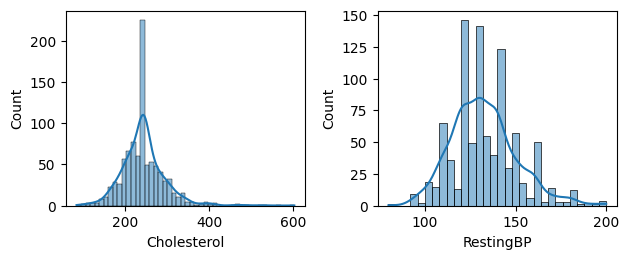

In [155]:
# plot graph again
plotting("Cholesterol",1)
plotting("RestingBP",2)
plt.tight_layout()

In [156]:
!pip install sheryanalysis==0.1.0


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
import sheryanalysis as sh

In [158]:
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': <StringDtype(storage='python', na_value=nan)>,
  'ChestPainType': <StringDtype(storage='python', na_value=nan)>,
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': <StringDtype(storage='python', na_value=nan)>,
  'MaxHR': dtype('int64'),
  'ExerciseAngina': <StringDtype(storage='python', na_value=nan)>,
  'Oldpeak': dtype('float64'),
  'ST_Slope': <StringDtype(storage='python', na_value=nan)>,
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'c

<Axes: >

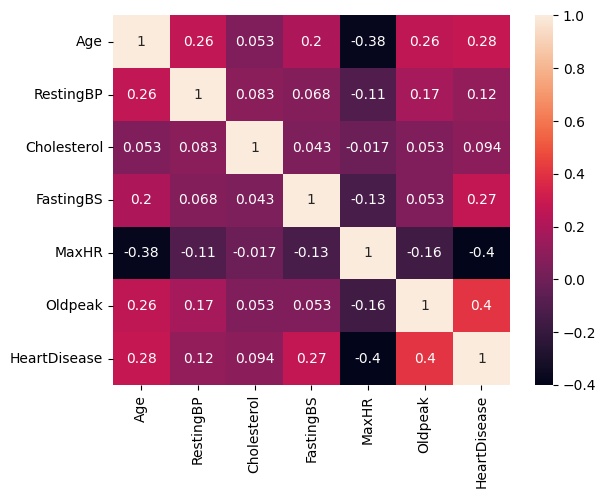

In [159]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [160]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263081,0.053378,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.263081,1.000000,0.083074,0.067812,-0.109662,0.174220,0.117938
Cholesterol,0.053378,0.083074,1.000000,0.043019,-0.017248,0.053028,0.094082
FastingBS,0.198039,0.067812,0.043019,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.109662,-0.017248,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.174220,0.053028,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.117938,0.094082,0.267291,-0.400421,0.403951,1.000000


<Axes: xlabel='Sex', ylabel='count'>

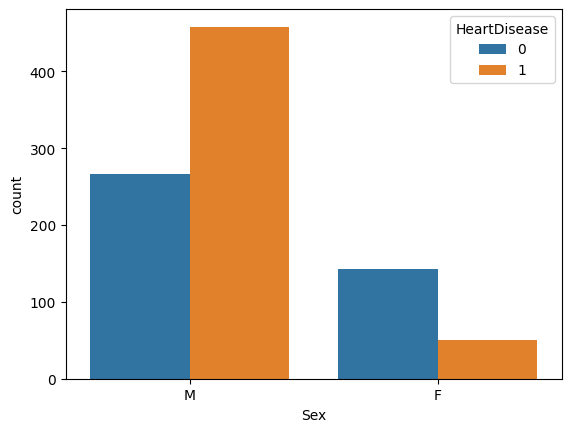

In [161]:
sns.countplot(x=df["Sex"],hue=df["HeartDisease"])

<Axes: xlabel='ChestPainType', ylabel='count'>

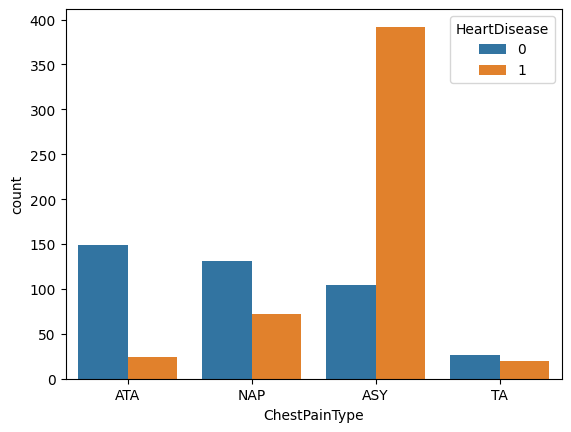

In [162]:
sns.countplot(x=df["ChestPainType"],hue=df["HeartDisease"])

<Axes: xlabel='FastingBS', ylabel='count'>

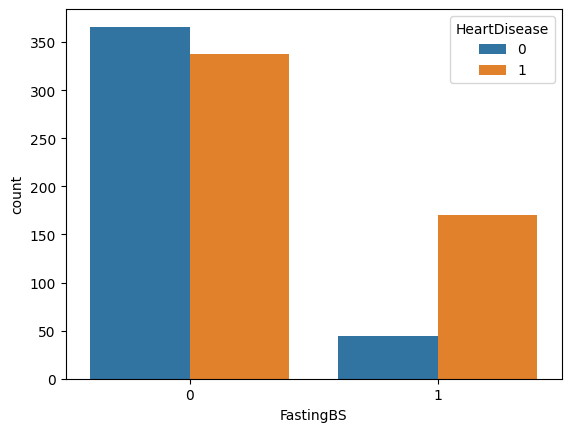

In [163]:
sns.countplot(x=df["FastingBS"],hue=df["HeartDisease"])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

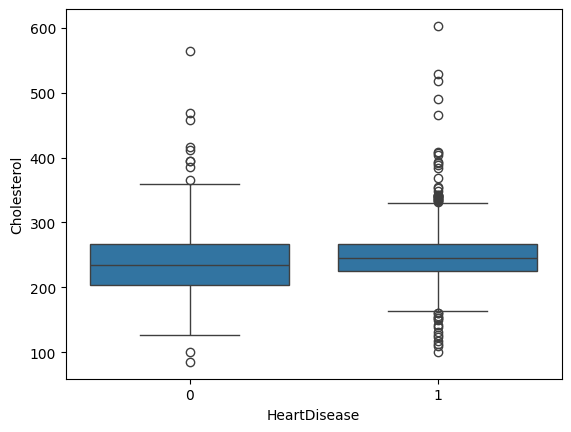

In [164]:
sns.boxplot(x="HeartDisease",y="Cholesterol", data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

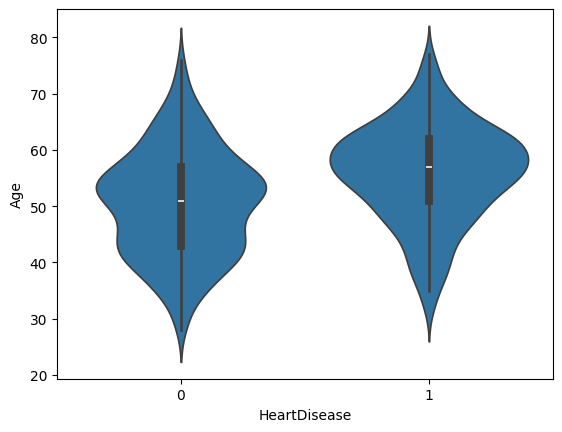

In [165]:
sns.violinplot(x="HeartDisease",y="Age",data=df)

In [166]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


### Data preprocessing and cleaning


In [167]:
df_encode = pd.get_dummies(df,drop_first=True)

In [168]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [169]:
# convert all true false values to number 1 and 0
df_encode = df_encode.astype(int)

In [170]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [171]:
# now apply standard scaling
from sklearn.preprocessing import StandardScaler

In [172]:
cols_to_scale = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]

In [173]:
scaler=StandardScaler()
df_encode[cols_to_scale] = scaler.fit_transform(df_encode[cols_to_scale])

In [174]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


-------------------------------------------------------------------------------------------------------------------------------------

Pr2 below

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [176]:
df_encode
X = df_encode.drop("HeartDisease", axis=1)
Y = df_encode["HeartDisease"]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42,test_size=0.20)

In [178]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# TODO
# transform only below instead of fit_transform
X_test_scaled = scaler.fit_transform(X_test)

In [179]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":  DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

In [180]:
result = []

<Axes: >

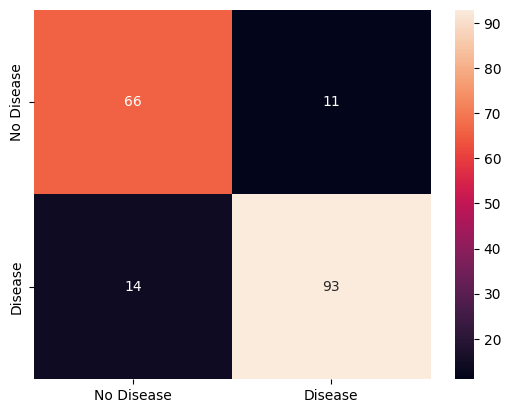

In [230]:
knn_m = KNeighborsClassifier()
knn_m.fit(X_train_scaled, y_train)
y_pred = knn_m.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",  
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])

In [181]:
for name,model_fn in models.items():
    print("Doing model: ",name, " _currently")
    model_fn.fit(X_train_scaled,y_train)
    # check for overfit and underfit too TODO
    y_pred = model_fn.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    print(f"Accuracy Score: {acc*100}%")
    cm = confusion_matrix(y_test,y_pred)
    print("Confusion matrix: ")
    print(cm)
    f1 = f1_score(y_test,y_pred)
    print(f"F1 score is: {f1*100}%")
    c_report = classification_report(y_test,y_pred)
    print(c_report)
    result.append({
        "model": name,
        "Accuracy score": acc,
        "F1 Score": f1,
        # "Confusion matrix": cm,
        # "Classification report": c_report,
        })


Doing model:  Logistic Regression  _currently
Accuracy Score: 86.95652173913044%
Confusion matrix: 
[[67 10]
 [14 93]]
F1 score is: 88.57142857142857%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Doing model:  KNN  _currently
Accuracy Score: 86.41304347826086%
Confusion matrix: 
[[66 11]
 [14 93]]
F1 score is: 88.15165876777252%
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Doing model:  Decision Tree  _currently
Accuracy Score: 78.2

In [187]:
result

[{'model': 'Logistic Regression',
  'Accuracy score': 0.8695652173913043,
  'F1 Score': 0.8857142857142857},
 {'model': 'KNN',
  'Accuracy score': 0.8641304347826086,
  'F1 Score': 0.8815165876777251},
 {'model': 'Decision Tree',
  'Accuracy score': 0.782608695652174,
  'F1 Score': 0.803921568627451},
 {'model': 'Support Vector Machine',
  'Accuracy score': 0.8478260869565217,
  'F1 Score': 0.8679245283018868},
 {'model': 'Naive Bayes',
  'Accuracy score': 0.8532608695652174,
  'F1 Score': 0.8682926829268293}]

In [188]:
import pandas as pd

# Only show summary columns (not confusion matrix or full report)
summary = [
    {
        "Model": r["model"],
        "Accuracy": round(r["Accuracy score"]*100, 2),
        "F1 Score": round(r["F1 Score"]*100, 2)
    }
    for r in result
]

pd.DataFrame(summary)

,Model,Accuracy,F1 Score
0,Logistic Regression,86.96,88.57
1,KNN,86.41,88.15
2,Decision Tree,78.26,80.39
3,Support Vector Machine,84.78,86.79
4,Naive Bayes,85.33,86.83


In [189]:
for r in result:
    print(f"\nModel: {r['model']}")
    print(f"Accuracy: {r['Accuracy score']*100:.2f}%")
    print(f"F1 Score: {r['F1 Score']*100:.2f}%")
    # print("Confusion Matrix:")
    # print(r["Confusion matrix"])
    # print("Classification Report:")
    # print(r["Classification report"])


Model: Logistic Regression
Accuracy: 86.96%
F1 Score: 88.57%

Model: KNN
Accuracy: 86.41%
F1 Score: 88.15%

Model: Decision Tree
Accuracy: 78.26%
F1 Score: 80.39%

Model: Support Vector Machine
Accuracy: 84.78%
F1 Score: 86.79%

Model: Naive Bayes
Accuracy: 85.33%
F1 Score: 86.83%


In [206]:
# save result array to pickle file
import pickle
logistic_reg = models["Logistic Regression"] # using it as it gave max accuracy
with open('result.pkl', 'wb') as f:
    pickle.dump(logistic_reg, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# list of cols
with open('cols.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


In [207]:
with open('result.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
print(loaded_data)

with open('scaler.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
print(loaded_data)

with open('cols.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
print(loaded_data)



LogisticRegression()
StandardScaler()
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [222]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,1,0,0,1,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,1,0,1,0,0,0,0,0,1,0


In [223]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1
